# MINI BATCH GRADIENT DESCENT

**Add the directory of the m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import necessary packages and modules**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from m_learn.logistic_regression import mini_batch_classifier
from m_learn.utility.data_preprocessing import get_xy_data
from m_learn.utility.data_preprocessing import train_test_feature_scaler
import matplotlib.pyplot as plt
import matplotlib

## 1. Load and preprocess data

**Load data**

In [3]:
data = pd.read_csv("./../../data/porto_seguro_safe_driver_prediction/train.csv")

In [4]:
data.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


**Drop the id column**

In [5]:
data = data.drop("id", axis=1)

**Set features and output of the models**

In [6]:
output = 'target'
features = data.columns.tolist()
features.remove(output)

**Train test split the data**

In [7]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 0)

**Scale train and test data using m_learn functions**

In [8]:
# import the minmax scaler module from scikit learn
from sklearn.preprocessing import MinMaxScaler
# create a scalar object that scales data into a range of 0 to 1
scaler = MinMaxScaler((0,1))
# scale the training and test set using the specialized scaling function we created earlier
train_data, test_data = train_test_feature_scaler(scaler, train_data, test_data, features)

**Extract feature matrix and output labels of the train and test set**

In [9]:
X_train, Y_train = get_xy_data(train_data, features=features, output=output)
X_test, Y_test = get_xy_data(test_data, features=features, output=output)

## 2. Investigate the convergence of cost of mini batch classifiers having different batch sizes

**Model parameters**

In [10]:
step_size = 1e-3
maximum_iterations = 5000
verbose = False

**List of batch sizes**

In [11]:
batch_sizes = [100, 500, 2000, 10000]

**List to store the objects of the classifiers**

In [12]:
classifiers = []

**Fit mini batch classifiers having different batch sizes**

In [13]:
# iterate through each batch size
for n, batch_size in enumerate(batch_sizes):
    # create the mini batch classifier object
    classifier = mini_batch_classifier(track_logistic_cost=True)
    # fit the classifier using the train set
    classifier.fit(X_train, Y_train, step_size, batch_size, maximum_iterations = maximum_iterations, verbose = verbose)
    # append the object of classifier to the designated list
    classifiers.append(classifier)
    # print statement
    print("Finished fitting classifier:", n+1)

Finished fitting classifier: 1
Finished fitting classifier: 2
Finished fitting classifier: 3
Finished fitting classifier: 4


**Plots of Cost vs Iterations for the classifiers**

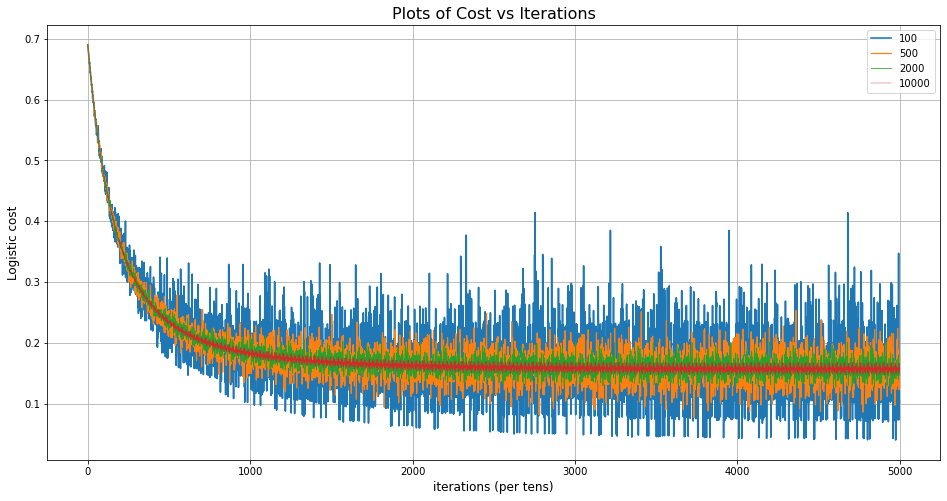

In [14]:
linewidths = [1.6,1.2,0.8,0.4]
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
for classifier, batch_size, linewidth in zip(classifiers, batch_sizes, linewidths):
    plt.plot(classifier.log_of_logistic_cost, label = str(batch_size), linewidth = linewidth)
plt.ylabel('Logistic cost', fontsize = 12)
plt.xlabel('iterations (per tens)', fontsize = 12)
plt.legend()
plt.title("Plots of Cost vs Iterations", fontsize = 16)
plt.grid()
plt.show()